In [1]:
!pip install -q pyclustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from pyclustering.cluster.kmedoids import kmedoids
from pyclustering.utils import read_sample
from pyclustering.samples.definitions import SIMPLE_SAMPLES
from pyclustering.cluster import cluster_visualizer

In [6]:
X, y

(array([[ -7.79834899,  -8.57979833],
        [ -8.60045392,  -7.64922068],
        [ -0.8641078 ,   6.57259883],
        [  4.20451643,   4.17072339],
        [-10.95587626,  -8.89628222],
        [  6.35519808,   1.65329262],
        [ -2.16283577,   9.78492089],
        [  5.46574174,   0.84572058],
        [ -3.4675461 ,   8.64296817],
        [ -4.89180462,  10.32739335],
        [ -3.71261085,  12.7188425 ],
        [  5.35390981,   0.58735049],
        [ -2.09147043,   5.09494588],
        [ -5.33993911,   8.17299548],
        [ -8.18091233,  -7.85436036],
        [ -3.91330381,   8.35896184],
        [-10.13471207,  -6.7839397 ],
        [  0.58959366,   2.34607831],
        [ -2.31504252,  10.95157611],
        [ -1.33548344,  13.39519738],
        [ -0.19200647,   7.37292149],
        [ -2.83176905,   9.82238784],
        [  6.5901183 ,   1.67905492],
        [ -7.10428329,  -7.32204879],
        [ -3.43603301,   8.08282662],
        [ -5.82001884,  -3.99697235],
        [ -8

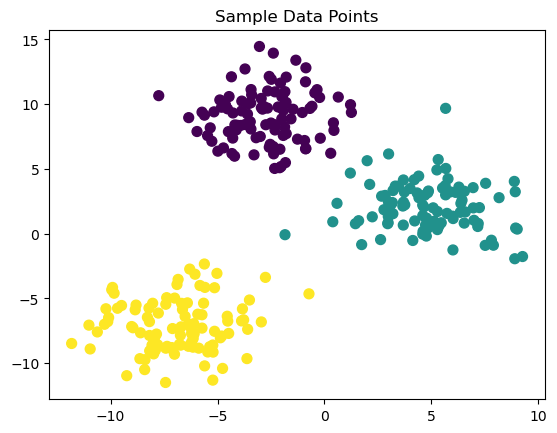

In [2]:
# Generate sample data
X, y = make_blobs(n_samples=300, centers=3, random_state=42, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='viridis')
plt.title('Sample Data Points')
plt.show()

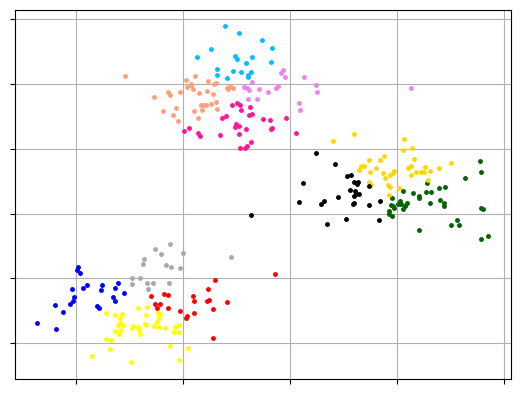

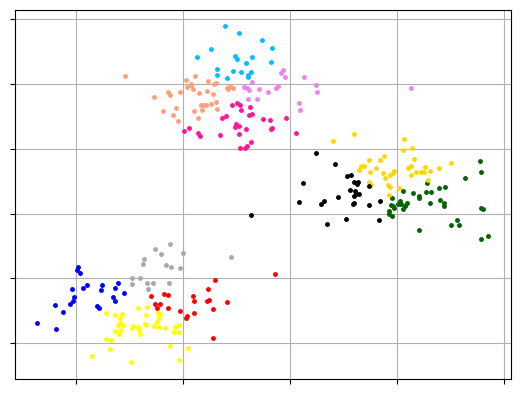

In [16]:
# Initialize K-Medoids with 3 clusters and random initial medoids
initial_medoids = np.random.choice(len(X), 11, replace=False).tolist()
kmedoids_instance = kmedoids(X.tolist(), initial_medoids)
# Run K-Medoids clustering
kmedoids_instance.process()
clusters = kmedoids_instance.get_clusters()
# Visualize the clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(clusters, X.tolist())
visualizer.show()

In [17]:
def balance_clusters(clusters, desired_size=None):
    """Balance the size of clusters by moving points from larger clusters to smaller ones."""
    if desired_size is None:
        desired_size = sum(len(cluster) for cluster in clusters) // len(clusters)

    overflow = []  # Points that are in clusters that are too large
    underflow = []  # Clusters that are too small

    for cluster in clusters:
        while len(cluster) > desired_size:
            overflow.append(cluster.pop())
        while len(cluster) < desired_size:
            underflow.append(cluster)

    for point in overflow:
        underflow[0].append(point)
        if len(underflow[0]) == desired_size:
            underflow.pop(0)

    return clusters

# Balance the clusters
balanced_clusters = balance_clusters(clusters)

# Visualize the balanced clusters
visualizer = cluster_visualizer()
visualizer.append_clusters(balanced_clusters, X.tolist())
visualizer.show()

MemoryError: 